# 1. Abstract

In the real word, merchants always need to solve problems of selecting item to sell and trying to maximize the profit.In most instances, the outcomes of sell always have two possible outcomes: purchase or not, by other word, "success" and "failure". So we can utilize Bernoulli trial to analyse this case:

One merchat plans to purchase and stock 1000 packages of face masks to sell during Covid-19, Besides, there are 10 typs of masks that are available on the market. However, he is not sure which ones are popular and get confused how to make this order about type distribution.Based on above situation, his partner is going to use Contextual Bandits theory with Thompson Sampling, e-greedy, UBC, and random sampling to assist this problem.

At last, through simulation and modeling, we can conclude that Thompson sampling performs best with highest reward, and UBC is also fit to this case well.

# 2. Setting up the enivironment
The multi-armed bandit problem is a classic problem that well demonstrates the exploration vs exploitation dilemma.

In [19]:
# Define Environment

# Import libraries
import numpy as np

# Define the total number of turns, which are total sell chances in this case
T = 1000
# Define the total number of slot machines, which are item types in this case
N = 10

# Create random rates between 0 and 1, which are the true situation for each item type purchased rate
true_award = np.random.uniform(0,1,N)# The true rate to be sold

print('For true results:') 
for i in range(N):
    print('True Award Rate for type{0}: {1:.2%}'.format(i,true_award[i]))
print('True Conclusion: The best type to sell acutually is type {}!'.format(np.argmax(true_award)))


For true results:
True Award Rate for type0: 81.94%
True Award Rate for type1: 69.49%
True Award Rate for type2: 66.61%
True Award Rate for type3: 32.42%
True Award Rate for type4: 67.17%
True Award Rate for type5: 88.07%
True Award Rate for type6: 83.95%
True Award Rate for type7: 58.55%
True Award Rate for type8: 93.02%
True Award Rate for type9: 82.49%
True Conclusion: The best type to sell acutually is type 8!


In [20]:
# Create Data Matrix
# This cell is from [1]
# The matrix with one row for each turn, and one column for each item type.
# Each item in the matrix represents the outcome of what would happen on that particular turn. 
# A value of "1" indicates that we would win, while a value of "0" indicates that we would lose. 
# The number of "wins" for each type is determined by its true Award  rate.

outcomes = np.zeros((T, N)) #create a two-dimensional numpy array, and fill it with zeros
for t in range(T): #for each turn
    for n in range(N): #for each slot machine
        #Get a random number between 0.0 and 1.0.
        #If the random number is less than or equal to this type true award rate, then set the outcome to "1".
        #Otherwise, the outcome will be "0" because the entire matrix was initially filled with zeros.
        if np.random.rand() <= true_award[n]:
            outcomes[t][n] = 1

#display the first 15 rows of data
print(outcomes[0:15, 0:6]) #this sort of indexing means "rows 0 to 14" (i.e., the first 15 rows) and "columns 0 through 5" (i.e., the first six columns)

[[1. 1. 1. 0. 1. 1.]
 [1. 1. 1. 0. 1. 1.]
 [0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1.]
 [1. 0. 1. 0. 1. 1.]
 [1. 0. 1. 0. 1. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 1. 1. 1. 1. 1.]
 [0. 1. 0. 0. 1. 1.]
 [1. 1. 1. 0. 1. 1.]
 [1. 1. 0. 1. 1. 1.]
 [1. 0. 0. 0. 1. 0.]
 [1. 0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0. 1.]
 [0. 1. 1. 1. 1. 0.]]


# 3. Thompson sampling
Thompson sampling has a simple idea but it works great for solving the multi-armed bandit problem.

In [21]:
# Thompson sampling

# Generate random numbers by beta(win[arm], lose[arm]) to each type, and choose the biggest one in this turn

# Create arrays to contain the win (purchased) and lose (not purchased) for each item type
win = np.zeros(N)
lose = np.zeros(N)
estimated_award = np.zeros(N)

# Thompson Samping with  beta distribution
def Thompson_sampling():
    arm_prob = [np.random.beta(win[i]+1, lose[i]+1) for i in range(N)]
    item = np.argmax(arm_prob)
    reward = np.random.binomial(n=1,p=true_award[item])
    return item, reward

# Simulate the outcomes of purchase
ts_total_reward = 0
for t in range(T):
    item, reward = Thompson_sampling()
    if reward==1:
        win[item]+=1
    else:
        lose[item]+=1
    ts_total_reward+=reward

    
# Show results
print('Number of turns {0}:'.format(T))  

print('For Thompson Sampling results:')  
for i in range(N):
    estimated_award[i] = win[i]/(win[i]+lose[i])
    print('Estimated Award for type{0}: {1:.2%}'.format(i, estimated_award[i]))
print('Thompson Sampling Conclusion:')  
print('The best type to sell is type {}!'.format(np.argmax(estimated_award)))
print('The total times to sell is {}!'.format(ts_total_reward))

Number of turns 1000:
For Thompson Sampling results:
Estimated Award for type0: 87.78%
Estimated Award for type1: 80.00%
Estimated Award for type2: 74.07%
Estimated Award for type3: 0.00%
Estimated Award for type4: 60.00%
Estimated Award for type5: 86.49%
Estimated Award for type6: 84.85%
Estimated Award for type7: 40.00%
Estimated Award for type8: 91.80%
Estimated Award for type9: 0.00%
Thompson Sampling Conclusion:
The best type to sell is type 8!
The total times to sell is 885!


# 4. E-greedy
The ε-greedy algorithm takes the best action most of the time, but does random exploration occasionally. The action value is estimated according to the past experience by averaging the rewards associated with the target action a that we have observed so far (up to the current time step t)

In [22]:
# e-greedy
# Choose the current-best-reward one with probability equals epsilon; 
# Choose random ones with probability equals 1-epsilon
estimated_award = np.zeros(N)
item_count = np.zeros(N)
epsilon = 0.1

def e_greedy():
    choose = np.random.binomial(n=1,p=epsilon)
    if choose:
        item = np.argmax(estimated_award)
        reward = np.random.binomial(n=1,p=true_award[item])
    else:
        item = np.random.choice(N, 1)
        reward = np.random.binomial(n=1,p=true_award[item])
    return item, reward

e_total_award = 0
for t in range(T):
    item, reward = e_greedy()
    e_total_award+=reward
    estimated_award[item] += reward
    item_count[item]+=1

e_total_award=e_total_award[0]

#Show results
print('Number of turns {0}:'.format(T))  

print('For e-greedy results:')
for i in range(N):
    estimated_award[i] /= item_count[i]
    print('Estimated Award for type{0}: {1:.2%}'.format(i, estimated_award[i]))
print('E-greedy Conclusion:')
print('The best type to sell is type {}!'.format(np.argmax(estimated_award)))
print('The total times to sell is {}!'.format(e_total_award))

Number of turns 1000:
For e-greedy results:
Estimated Award for type0: 78.89%
Estimated Award for type1: 70.27%
Estimated Award for type2: 77.78%
Estimated Award for type3: 34.04%
Estimated Award for type4: 66.35%
Estimated Award for type5: 94.94%
Estimated Award for type6: 89.47%
Estimated Award for type7: 52.50%
Estimated Award for type8: 88.00%
Estimated Award for type9: 82.76%
E-greedy Conclusion:
The best type to sell is type 5!
The total times to sell is 722!


# 5. UBC
Random exploration gives us an opportunity to try out options that we have not known much about. However, due to the randomness, it is possible we end up exploring a bad action which we have confirmed in the past (bad luck!). To avoid such inefficient exploration, one approach is to decrease the parameter ε in time and the other is to be optimistic about options with high uncertainty and thus to prefer actions for which we haven’t had a confident value estimation yet. Or in other words, we favor exploration of actions with a strong potential to have a optimal value.

In [23]:
#UBC
# Estimate the true probability by observation p' and error delta, adjusting the probability
ucb_c=np.sqrt(2)
estimated_award = np.zeros(N) # q-value of actions
choose_count = np.zeros(N) # action count

u_total_award = 0

def cal_delta(T, item):
    if choose_count[item] == 0:
        return 1
    else:
        return ucb_c*np.sqrt(np.log(T) / choose_count[item])

def UCB(t, N):
    upper_bound_probs = [estimated_award[item] + cal_delta(t, item) for item in range(N)]
    item = np.argmax(upper_bound_probs)
    reward = np.random.binomial(n=1, p=true_award[item])
    return item, reward


for t in range(1,T+1):
    item, reward = UCB(t, N)
    u_total_award += reward

    estimated_award[item] = (choose_count[item]*estimated_award[item] + reward) / (choose_count[item]+1)
    choose_count[item]+=1

#Show results
print('Number of turns {0}:'.format(T))  

print('For UCB results:')
for i in range(N):
    print('Estimated Award for type{0}: {1:.2%}'.format(i, estimated_award[i]))
    
print('For UCB Conclusion:')
print('The best type to sell is type {}!'.format(np.argmax(estimated_award)))
print('The total times to sell is {}!'.format(u_total_award))


Number of turns 1000:
For UCB results:
Estimated Award for type0: 81.68%
Estimated Award for type1: 59.52%
Estimated Award for type2: 70.32%
Estimated Award for type3: 37.14%
Estimated Award for type4: 67.94%
Estimated Award for type5: 88.48%
Estimated Award for type6: 0.00%
Estimated Award for type7: 0.00%
Estimated Award for type8: 0.00%
Estimated Award for type9: 0.00%
For UCB Conclusion:
The best type to sell is type 5!
The total times to sell is 760!


# 6. Ramdom sampling

In [24]:
# Random Sampling

# This cell is from [1]
#Determine how many times the items can be sell if we randomly choose a type to sell for each turn
total_wins_random_sampling=0;
for t in range (T):
    n=np.random.randint(0, N) #randomly choose a type
    if outcomes[t][n] ==1:
        total_wins_random_sampling+=1


#Show results
print('Total wins with Random sampling: {}'.format(total_wins_random_sampling))
print('Total wins with Thompson sampling: {}'.format(ts_total_reward))
print('Total wins with e-greedy: {}'.format(e_total_award))
print('Total wins with UBC: {}'.format(u_total_award))

Total wins with Random sampling: 698
Total wins with Thompson sampling: 885
Total wins with e-greedy: 722
Total wins with UBC: 760


# 7. Conclusion

(1)Based on result analysis and comparison, Thompson sampling is able to get the most reward (maximized profit) in most instances, and UBC can also get quite high reward.

(2)Random sampling always get extremely unstable results and ususlly can't get high rewards. So this sampling method is not recommended.

(3)E-greedy often performs at the middle level about the reward consequence.

(4)Thompson sampling frequently keeps consistent with the reality outcomes in this simulation, including the best-selling type. So, Thompson sampling is the most suitable method to this case.

# 8. Questions Answers
1. Important Hyperparameters

Thompson Sampling: 
Alpha and Beta are important hyperparameters for Thompson Sampling. Because for the Bernouilli-greedy algorithm, Bernouilli parameters are expected values of the Beta distribution, and Thompson algorithm follows Thompson(K,𝛼,𝛽)[2].

e-greedy:
Epsilon is very important for e-greedy algorithm. Using incremental update rule.we need update the Q-value of each action[2].When simulating by e-greedy, we use eplision possibility to choose the best one based on experience, and use 1-eplision as possibility to choose ones randomly. So eplision is critical to this algorithm. 

UBC:
Hyperparameter c is important, and it can weigh the uncertainty of UBC algorithm. The UCB uncertainty is deterministic and beneficial[2], so c is key and need tuning.

Random Sampling:
Random Sampling chooses individual randomly and entirely by chance. So not much hyperparameters are used in random sampling and parameters like T,N in this code are important.

2. Action Space

Action space here is mainly effect by N (item type) or steps in this code. We can set different step values and see how they influence these algorithm.

From the part 9 [2] Graph 1 and 2, we can see, after step raises from 10 to 200, epsilon-greedy's cerve doesn't change a lot and keep the same trend.However, the regret value get a little higher at the same N value.Because from equations of e-greedy, it doesn't related to N a lot.
For Thompson, the slop get slow down and lose turning point, and regret value get increased.The curve doesn't get stable at a value after increasing step. Because from Thompson equations, N increase will cause continuous changes of regret so the curve is not very sharp in the beginning. 
For UCB, the curve becomes discontinuous and discreted. It has great jump and distrubution for about every 200 x value. From UCB's equations, we can find ln function can cause some extreme values and make the curve discreted. And ln function is also symmetrical in its functional graph so the curve for UCB also shows a little regurlar distrubution.
For Random sampling, it does't have summarizable and obvious distribution changes because its simulation process is random.

3. Stationarity

When we want to set the data to be non-stationarity, we need to resample the action Bernouilli parameters and see how it affacts.
From the part 9 [2] Graph 1 and 3, we can see, all the algorithm curves get restart regularly because non-stationarity environment requires resample for every 100 steps. So stationarity is important when simulating and modeling in order to get a stable result.

4. Stop exploring 

When to stop exploring is based on the rate we want acquire.Optimal stopping is helpful to gain the information before making a decision. Our experience of the cases and ways to simulation and model are important. We can set expected value, variance of data, reward result or other key value as the line and standard to stop exploring.In addition, observing the curve between different parameters also help control the sampling.

E-greddy is strightforward and based on incremental update rule. From some obervation before and experience, updating Q-value promptly and controlling epsilon possibility is important to decide when to stop.
Thompson algorithm and UCB include measure of uncertainty.Fundamentally, the UCB uncertainty is deterministic and beneficial, whereas in the Thompson case, uncertainty increases the expected reward variance[2]. We can decide to stop Thompson by argmax𝜃̂ and oberve(x) to achieve an idea reward variance based on quality and uncertainty. While use c value to assist the stopping of UCB.
Random sampling is totally stochastic and uncertain, it is easy to get bad actions and unexpected values. We can stop when risk is high or can't bear its unknow reult. 

Exploration-exploitation tradeoff:
It is the decision making when cosidering choosing a familiar option with a known reward value (exploitation) or choosing an unfamiliar option with an unknown or uncertain reward value (exploration). In oder to deal with this dilemma, we need to simulate and model wisely to reach a good expected result or balance between choices and avoid bad actions.

5. Past actions

Thompson Sampling:
It incorporates uncertainty by modeling Bernouilli parameter with prior beta distribition and always chooses the action with the highest expected reward.So Thompson algorithm will remember past actions and data related to best reward shortly before higher value appear to compare.

E-greedy:
Because of incremental update rule, to update the Q-value of each action, e-greedy need maintain a count of each action.

UBC:
Based on some equations from this algorithm, it always picks the arms with the highest plausible reward so it need observe Ti(t-1) samples from bandit i and has oberved mean rewards for that bandit. UBC also need choose the action i that maximizes the quantity. In conclusion, it need to remember past actions to get highest plausible estimate of mean for badnit.

Random sampling:
It is basically random and pick up data by chance. So it doesn't need to remember past actions and only simulate current action.

6. Thompson Sampling with non-Beta(normal) distribution 

In [13]:
# Thompson sampling with normal distribution
# This cell is main adapted from[1]
# Use environment set before
# Generate random numbers by normal(win[arm], lose[arm]) to each type, and choose the biggest one in this turn

#for each turn
for t in range(T):
    index = -1
    max_normal = -1 # note that max beta

    for i in range(N): #for each slot machine
        a = win[i] + 1
        b = lose[i] + 1

        random_normal = np.random.normal(a, b) # Use normal distribution

        if random_normal > max_normal:
            max_norma = random_normal 
            index = i 
    
    if outcomes[t][n] == 1:
        win[i] += 1
    else:
        lose[i] += 1

# Show result
print('Thompson sampling with normal distribution result:')  
print('Number of turns {0}:'.format(T))  
number_of_times_played = win + lose
for i in range(N): 
    print('Item type {0} was sold {1} times that is, {2:.2%}'.format(i, number_of_times_played[i], (number_of_times_played[i]/T)))

#identify and display the best slot machine to play
print('\nOverall Conclusion: The best type to sell is type {}!'.format(np.argmax(number_of_times_played)))
for i in range(N):
  print('True award for type {0}: {1:.2%}'.format(i, true_award[i]))  

Thompson sampling with normal distribution result:
Number of turns 1000:
Item type 0 was sold 4.0 times that is, 0.40%
Item type 1 was sold 2.0 times that is, 0.20%
Item type 2 was sold 3.0 times that is, 0.30%
Item type 3 was sold 4.0 times that is, 0.40%
Item type 4 was sold 4.0 times that is, 0.40%
Item type 5 was sold 4.0 times that is, 0.40%
Item type 6 was sold 577.0 times that is, 57.70%
Item type 7 was sold 18.0 times that is, 1.80%
Item type 8 was sold 372.0 times that is, 37.20%
Item type 9 was sold 1012.0 times that is, 101.20%

Overall Conclusion: The best type to sell is type 9!
True award for type 0: 46.97%
True award for type 1: 24.01%
True award for type 2: 14.12%
True award for type 3: 52.37%
True award for type 4: 29.62%
True award for type 5: 64.59%
True award for type 6: 92.06%
True award for type 7: 85.18%
True award for type 8: 89.88%
True award for type 9: 60.70%


7. Code citing

The code parts which need cite are shown in the code comments according to reference in the following part.The other parts are what I adapted and wrote myself.

9. License

MIT License and copyright is shown at the end of this file

# 9. Experiments and curves
This part is mainly from [2], in order to show the graphs and curves of these algorithm and answer question 2 (Action Space) and 3 (Stationarity) better.

In [14]:
# Bernouilli sampling
import numpy as np
import matplotlib.pyplot as plt
from pdb import set_trace

stationary=True
class Bandit():
    def __init__(self, arm_count):
 
        self.arm_count = arm_count
        self.generate_thetas()
        self.timestep = 0

        global stationary
        self.stationary=stationary
     
    def generate_thetas(self):
        self.thetas = np.random.uniform(0,1,self.arm_count)
    def get_reward_regret(self, arm):
   
        self.timestep += 1
        if (self.stationary==False) and (self.timestep%100 == 0) :
            self.generate_thetas()
    # Simulate bernouilli sampling
        sim = np.random.uniform(0,1,self.arm_count)
        rewards = (sim<self.thetas).astype(int)
        reward = rewards[arm]
        regret = self.thetas.max() - self.thetas[arm]
    
        return reward, regret

# Thompson sampling
class BetaAlgo():
    
    def __init__(self, bandit):
  
        self.bandit = bandit
        self.arm_count = bandit.arm_count
        self.alpha = np.ones(self.arm_count)
        self.beta = np.ones(self.arm_count)
  
    def get_reward_regret(self, arm):
        reward, regret = self.bandit.get_reward_regret(arm)
        self._update_params(arm, reward)
        return reward, regret
  
    def _update_params(self, arm, reward):
        self.alpha[arm] += reward
        self.beta[arm] += 1 - reward

class BernGreedy(BetaAlgo):
    def __init__(self, bandit):
        super().__init__(bandit)
   
    @staticmethod
    def name():
        return 'beta-greedy'
   
    def get_action(self):
        theta = self.alpha / (self.alpha + self.beta)
        return theta.argmax()

class BernThompson(BetaAlgo):
    def __init__(self, bandit):
        super().__init__(bandit)

    @staticmethod
    def name():
        return 'thompson'

    def get_action(self):
    
        theta = np.random.beta(self.alpha, self.beta)
        return theta.argmax()

# E-greedy
epsilon = 0.1
class EpsilonGreedy():
    def __init__(self, bandit):
        global epsilon
        self.epsilon = epsilon
        self.bandit = bandit
        self.arm_count = bandit.arm_count
        self.Q = np.zeros(self.arm_count) # q-value of actions
        self.N = np.zeros(self.arm_count) # action count
  
    @staticmethod
    def name():
        return 'epsilon-greedy'
  
    def get_action(self):
        if np.random.uniform(0,1) > self.epsilon:
            action = self.Q.argmax()
        else:
            action = np.random.randint(0, self.arm_count)
        return action
  
    def get_reward_regret(self, arm):
        reward, regret = self.bandit.get_reward_regret(arm)
        self._update_params(arm, reward)
        return reward, regret
  
    def _update_params(self, arm, reward):
        self.N[arm] += 1 # increment action count
        self.Q[arm] += 1/self.N[arm] * (reward - self.Q[arm]) # inc. update rule
 
 # UCB
ucb_c = 2
class UCB():

    def __init__(self, bandit):
        global ucb_c
        self.ucb_c = ucb_c
        self.bandit = bandit
        self.arm_count = bandit.arm_count
        self.Q = np.zeros(self.arm_count) # q-value of actions
        self.N = np.zeros(self.arm_count) + 0.0001 # action count
        self.timestep = 1
  
    @staticmethod
    def name():
        return 'ucb'
  
    def get_action(self):
        ln_timestep = np.log(np.full(self.arm_count, self.timestep))
        confidence = self.ucb_c * np.sqrt(ln_timestep/self.N)
        action = np.argmax(self.Q + confidence)
        self.timestep += 1
        return action
  
    def get_reward_regret(self, arm):
        reward, regret = self.bandit.get_reward_regret(arm)
        self._update_params(arm, reward)
        return reward, regret
  
    def _update_params(self, arm, reward):
        self.N[arm] += 1 # increment action count
        self.Q[arm] += 1/self.N[arm] * (reward - self.Q[arm]) # inc. update rule

In [15]:
# Graph methods
def plot_data(y):
    x = np.arange(y.size)
    _ = plt.plot(x, y, 'o')

def multi_plot_data(data, names):
    x = np.arange(data[0].size)
    for i, y in enumerate(data):
        plt.plot(x, y, 'o', markersize=2, label=names[i])
    plt.legend(loc='upper right', prop={'size': 16}, numpoints=10)
    plt.show()

def simulate(simulations, timesteps, arm_count, Algorithm):
    sum_regrets = np.zeros(timesteps)
    for e in range(simulations):
        bandit = Bandit(arm_count)
        algo = Algorithm(bandit)
        regrets = np.zeros(timesteps)
        for i in range(timesteps):
            action = algo.get_action()
            reward, regret = algo.get_reward_regret(action)
            regrets[i] = regret
        sum_regrets += regrets  
    mean_regrets = sum_regrets / simulations
    return mean_regrets

def experiment(arm_count, timesteps=1000, simulations=1000):

    algos = [EpsilonGreedy, UCB, BernThompson]
    regrets = []
    names = []
    for algo in algos:
        regrets.append(simulate(simulations, timesteps, arm_count, algo))
        names.append(algo.name())
    multi_plot_data(regrets, names)

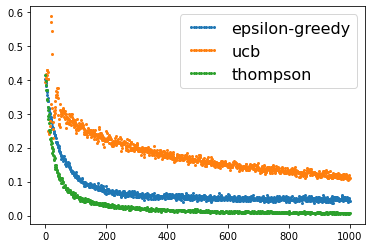

In [16]:
#Experiments

# Graph 1
arm_count = 10 # number of arms in bandit
epsilon = 0.1
ucb_c = 2
stationary=True
experiment(arm_count)

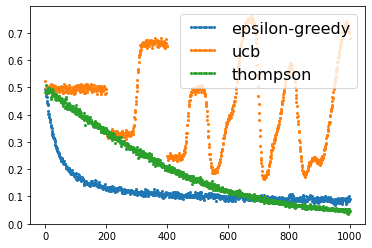

In [17]:
# Graph 2
arm_count = 200 # number of arms in bandit
epsilon = 0.1
ucb_c = 2
stationary=True
experiment(arm_count)

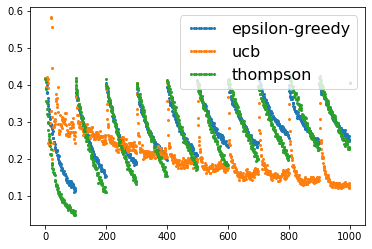

In [18]:
# Graph 3
arm_count = 10 # number of arms in bandit
epsilon = 0.1
ucb_c = 2
stationary=False
experiment(arm_count)

# Reference
[1]: Reinforcement Learning - Thompson Sampling & the Multi-Armed Bandit Problem. URL:https://colab.research.google.com/drive/1gdR7k7jtSRqYnPNHcbAKdIjGRjQXpfnA#scrollTo=3tlM4eA5b85A

[2]: Andre Clanflone-Thompson sampling.URL:https://colab.research.google.com/drive/1BHVH712x2Q2As9E5nN5Y8UR74T8w6AMO#scrollTo=lnzzQ4WZFLQ1 

[3]: Russo, Daniel, Benjamin Van Roy, Abbas Kazerouni, and Ian Osband. "A Tutorial on Thompson Sampling." arXiv preprint arXiv:1707.02038 (2017). URL:https://arxiv.org/abs/1707.02038

Copyright <2021> <Mengzhe Zhang>

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files
(the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge,
publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do 
so,subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF 
MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE 
FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR 
IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.